<a href="https://colab.research.google.com/github/nueleffiong/nlp/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Lib

In [ ]:
!pip install kaggle

In [ ]:
import os
import shutil

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving True.csv to True (1).csv
Saving Fake.csv to Fake (1).csv


# Importing Dataset

In [ ]:
import pandas as pd

# Load the True and Fake news datasets that were uploaded
true_df = pd.read_csv('/content/True.csv')
fake_df = pd.read_csv('/content/Fake.csv')

# Add a 'label' column to each DataFrame
true_df['label'] = 'real'
fake_df['label'] = 'fake'

# Combine the two DataFrames
data = pd.concat([true_df, fake_df], ignore_index=True)

# Display the first few rows of the combined DataFrame
display(data.head())

# Display information about the combined DataFrame
display(data.info())

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


None

In [ ]:
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",real
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",fake


In [ ]:
# check for missing values

In [ ]:
print(data.isnull().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [ ]:
# clean missing values
data =data.dropna()
print(data.shape)

(44898, 5)


In [ ]:
# check number of real/fake articles
print(data['label'].value_counts())

label
fake    23481
real    21417
Name: count, dtype: int64


In [ ]:
# convert labels to numbers: REAL =1 , FAKE =0
data['label_num'] = data['label'].map({'real': 1, 'fake': 0})

In [ ]:
# split the data sets into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label_num'], test_size=0.2, random_state=42)

In [ ]:
# convert text to features using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

In [ ]:
# Simple logistic regession
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9884187082405346


In [ ]:
# make a fake news from user inpt
headline = input("Enter a headline: ")
headline_tfidf = vectorizer.transform([headline])
prediction = model.predict(headline_tfidf)
if prediction == 1:
    print("This article looks real")
else:
    print("This article looks fake")

Enter a headline: The sky is white
This article looks fake


In [ ]:
# use BERT wth Huginface
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import torch

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline
import torch
bert_clf = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
bert_clf = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")
result = bert_clf("Breaking news: Trump is our president")[0]
print(f"Label: {result['label']}")

Device set to use cpu
Device set to use cpu


Label: POSITIVE


Data split successfully within this cell.
Vectorizer fitted successfully within this cell.


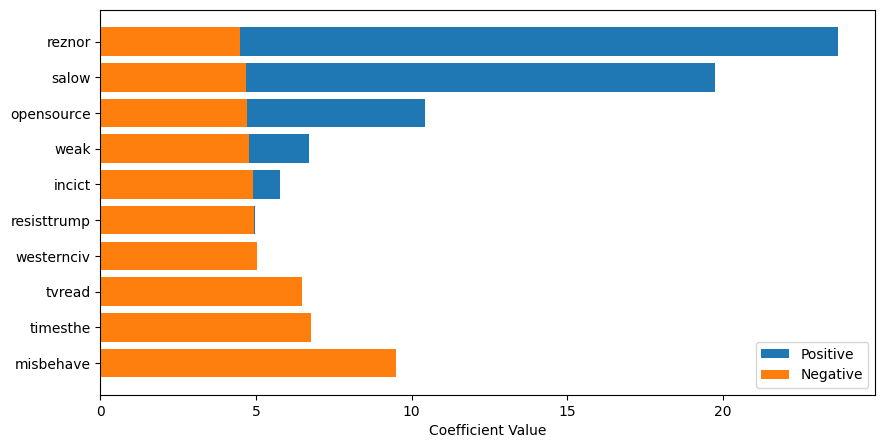

Visualization generated successfully.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd # Import pandas just in case data is not in scope

# Check if data is defined, if not, attempt to load (this is a fallback)
if 'data' not in locals() and 'data' not in globals():
    try:
        # Assuming the data files are in /content/ as per previous steps
        true_df = pd.read_csv('/content/True.csv')
        fake_df = pd.read_csv('/content/Fake.csv')
        true_df['label'] = 'real'
        fake_df['label'] = 'fake'
        data = pd.concat([true_df, fake_df], ignore_index=True)
        data['label_num'] = data['label'].map({'real': 1, 'fake': 0})
        print("Data loaded and processed within this cell (fallback).")
    except FileNotFoundError:
        print("Error: Data files not found. Please ensure True.csv and Fake.csv are in /content/ or run the data loading cells.")
        # Cannot proceed without data
        exit()
    except NameError:
         print("Error: Data loading failed. Please run the data loading cells first.")
         exit()


# Split the data sets into training and test sets
# This part assumes data and label_num are defined
try:
    X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label_num'], test_size=0.2, random_state=42)
    print("Data split successfully within this cell.")
except NameError:
    print("Error: data or label_num not defined. Please run data loading/processing cells first.")
    exit()


# convert text to features using TF-IDF
# Initialize and fit the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test) # Not needed for this visualization
print("Vectorizer fitted successfully within this cell.")


# Assuming 'model' (LogisticRegression) is defined from a previous cell
# If model is not defined, this part will raise a NameError
try:
    featurenames = np.array(vectorizer.get_feature_names_out())
    coefs = model.coef_[0]
    top_features =10
    top_pos = np.argsort(coefs)[-top_features:]
    top_neg = np.argsort(coefs)[:top_features]
    plt.figure(figsize=(10, 5))
    plt.barh(range(top_features), coefs[top_pos], align='center', label='Positive')
    plt.barh(range(top_features), np.abs(coefs[top_neg]), align='center', label='Negative') # Use absolute value for negative coefficients for bar plot
    plt.xlabel('Coefficient Value')
    plt.yticks(range(top_features), featurenames[top_pos])
    plt.legend()
    plt.show()
    print("Visualization generated successfully.")

except NameError:
    print("Error: 'model' (LogisticRegression) not defined. Please run the model training cell first.")
except Exception as e:
    print(f"An error occurred during visualization: {e}")